In [53]:
import numpy as np
import pandas as pd
import math
import base64
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import numpy as np
import pandas as pd
import math
import base64

In [59]:
geo2019 = pd.read_csv('geographic/ACSST1Y2019.S0701-Data.csv')
geo2019

,GEO_ID,NAME,S0701_C01_001E,S0701_C01_001EA,S0701_C01_001M,S0701_C01_001MA,S0701_C01_002E,S0701_C01_002EA,S0701_C01_002M,S0701_C01_002MA,...,S0701_C05_054MA,S0701_C05_055E,S0701_C05_055M,S0701_C05_055MA,S0701_C05_055EA,S0701_C05_056E,S0701_C05_056EA,S0701_C05_056M,S0701_C05_056MA,Unnamed: 1122
0,Geography,Geographic Area Name,Estimate!!Total!!Population 1 year and over,Annotation of Estimate!!Total!!Population 1 ye...,Margin of Error!!Total!!Population 1 year and ...,Annotation of Margin of Error!!Total!!Populati...,Estimate!!Total!!Population 1 year and over!!A...,Annotation of Estimate!!Total!!Population 1 ye...,Margin of Error!!Total!!Population 1 year and ...,Annotation of Margin of Error!!Total!!Populati...,...,Annotation of Margin of Error!!Moved; from abr...,Estimate!!Moved; from abroad!!HOUSING TENURE!!...,Margin of Error!!Moved; from abroad!!HOUSING T...,Annotation of Margin of Error!!Moved; from abr...,Annotation of Estimate!!Moved; from abroad!!HO...,Estimate!!Moved; from abroad!!PERCENT ALLOCATE...,Annotation of Estimate!!Moved; from abroad!!PE...,Margin of Error!!Moved; from abroad!!PERCENT A...,Annotation of Margin of Error!!Moved; from abr...,NaN
1,0100000US,United States,324665523,NaN,30094,NaN,15830835,NaN,34110,NaN,...,NaN,1.1,0.1,NaN,NaN,(X),(X),(X),(X),NaN
2,1600000US1714000,"Chicago city, Illinois",2659927,NaN,3741,NaN,128765,NaN,5546,NaN,...,NaN,0.9,0.2,NaN,NaN,(X),(X),(X),(X),NaN
3,1600000US2507000,"Boston city, Massachusetts",687036,NaN,3832,NaN,25308,NaN,2047,NaN,...,NaN,1.8,0.5,NaN,NaN,(X),(X),(X),(X),NaN
4,1600000US3651000,"New York city, New York",8236789,NaN,6957,NaN,421227,NaN,7000,NaN,...,NaN,1.3,0.1,NaN,NaN,(X),(X),(X),(X),NaN
5,1600000US5363000,"Seattle city, Washington",747296,NaN,1389,NaN,27215,NaN,3042,NaN,...,NaN,2.1,0.7,NaN,NaN,(X),(X),(X),(X),NaN


In [61]:
geo2019 = geo2019.replace('(X)',np.NAN)
geo2019 = geo2019.dropna(axis='columns')
geo2019 = geo2019.drop(columns = ["GEO_ID"])
geo2019 = geo2019.drop([0])
geo2019

,NAME,S0701_C01_001E,S0701_C01_001M,S0701_C01_002E,S0701_C01_002M,S0701_C01_003E,S0701_C01_003M,S0701_C01_004E,S0701_C01_004M,S0701_C01_005E,...,S0701_C05_051E,S0701_C05_051M,S0701_C05_052E,S0701_C05_052M,S0701_C05_053E,S0701_C05_053M,S0701_C05_054E,S0701_C05_054M,S0701_C05_055E,S0701_C05_055M
1,United States,324665523,30094,15830835,34110,53562950,32606,30373170,42282,45578475,...,0.6,0.1,0.4,0.1,0.6,0.1,0.3,0.1,1.1,0.1
2,"Chicago city, Illinois",2659927,3741,128765,5546,392627,11804,247917,6613,533707,...,0.4,0.2,0.4,0.1,0.6,0.1,0.3,0.1,0.9,0.2
3,"Boston city, Massachusetts",687036,3832,25308,2047,74530,2521,101848,1634,169201,...,0.9,0.8,1.0,0.2,1.4,0.3,0.8,0.3,1.8,0.5
4,"New York city, New York",8236789,6957,421227,7000,1193822,1464,692638,1048,1483549,...,0.9,0.3,0.9,0.1,1.0,0.1,0.4,0.1,1.3,0.1
5,"Seattle city, Washington",747296,1389,27215,3042,77098,3832,77759,4867,192362,...,0.1,0.3,1.3,0.4,1.4,0.4,0.6,0.3,2.1,0.7


In [113]:
names = geo2019["NAME"]
names = pd.DataFrame(data =names)
names

,NAME
1,United States
2,"Chicago city, Illinois"
3,"Boston city, Massachusetts"
4,"New York city, New York"
5,"Seattle city, Washington"


In [75]:
population = geo2019.iloc[:,7:19]
population = population.astype(int)

In [73]:
popEst = geo2019.iloc[:,338:350]
popEst = popEst.astype(float)

In [144]:
#multiply population by estimate percentage
population2019 = population.mul(popEst.values)
population2019

,S0701_C01_004E,S0701_C01_004M,S0701_C01_005E,S0701_C01_005M,S0701_C01_006E,S0701_C01_006M,S0701_C01_007E,S0701_C01_007M,S0701_C01_008E,S0701_C01_008M,S0701_C01_009E,S0701_C01_009M
1,175305017.4,4518.1,189332379.6,4590.0,96213834.2,3635.1,61010575.5,3689.5,59941047.6,1803.2,43911665.2,2096.7
2,1720073.4,6443.0,2022969.0,4582.0,562350.6,2986.8,186730.8,2538.9,362696.4,3490.0,111633.0,1945.8
3,1720285.8,4039.2,1106614.3,4301.7,188691.8,2383.2,202256.4,2989.8,82784.4,2129.4,30362.4,777.0
4,4307564.8,925.2,4771964.6,407.1,1171552.0,198.6,417099.2,108.2,523855.5,80.6,398152.0,150.2
5,1219291.5,16728.0,1752047.0,11071.5,350897.1,6016.8,166082.8,5119.4,51255.4,2324.0,62807.8,3035.7


In [77]:
populationT = population2019.T

In [80]:
total2019 = populationT.sum()
total2019

1    594165154.0
2      4651664.6
3      2513081.0
4     11485045.6
5      3550536.7
dtype: float64

In [95]:
geo2020 = pd.read_csv('geographic/ACSST5Y2020.S0701-Data.csv')
geo2020

geo2020 = geo2020.replace('(X)',np.NAN)
geo2020 = geo2020.dropna(axis='columns')
geo2020 = geo2020.drop(columns = ["GEO_ID"])
geo2020 = geo2020.drop([0])
geo2020

population = geo2020.iloc[:,7:19]
population = population.astype(int)

popEst = geo2020.iloc[:,338:350]
popEst = popEst.astype(float)

population2020 = population.mul(popEst.values)
population2020

populationT = population2020.T

total2020 = populationT.sum()
total2020

1    595182867.8
2      5232545.1
3      2822880.6
4     10651818.6
5      3896692.1
dtype: float64

In [96]:
geo2021 = pd.read_csv('geographic/ACSST1Y2021.S0701-Data.csv')
geo2021

geo2021 = geo2021.replace('(X)',np.NAN)
geo2021 = geo2021.dropna(axis='columns')
geo2021 = geo2021.drop(columns = ["GEO_ID"])
geo2021 = geo2021.drop([0])
geo2021

population = geo2021.iloc[:,7:19]
population = population.astype(int)

popEst = geo2021.iloc[:,338:350]
popEst = popEst.astype(float)

population2021 = population.mul(popEst.values)
population2021

populationT = population2021.T

total2021 = populationT.sum()
total2021

1    625734852.1
2      4988439.7
3      3347615.4
4     11592058.0
5      3646677.0
dtype: float64

In [90]:
total2019 = pd.DataFrame(data =total2019)

In [91]:
total2019 = total2019.rename(columns = {0:"TOTAL_2019"})


In [92]:
total2019

,TOTAL_2019
1,594165154.0
2,4651664.6
3,2513081.0
4,11485045.6
5,3550536.7


In [98]:
total2020 = pd.DataFrame(data =total2020)
total2020 = total2020.rename(columns = {0:"TOTAL_2020"})

In [99]:
total2020

,TOTAL_2020
1,595182867.8
2,5232545.1
3,2822880.6
4,10651818.6
5,3896692.1


In [100]:
total2021 = pd.DataFrame(data =total2021)
total2021 = total2021.rename(columns = {0:"TOTAL_2021"})

In [101]:
total2021

,TOTAL_2021
1,625734852.1
2,4988439.7
3,3347615.4
4,11592058.0
5,3646677.0


In [114]:
population_changes = names.merge(total2019, how = "left", left_index = True, right_index = True)
population_changes

,NAME,TOTAL_2019
1,United States,594165154.0
2,"Chicago city, Illinois",4651664.6
3,"Boston city, Massachusetts",2513081.0
4,"New York city, New York",11485045.6
5,"Seattle city, Washington",3550536.7


In [115]:
population_changes = population_changes.merge(total2020, how = "left", left_index = True, right_index = True)
population_changes

,NAME,TOTAL_2019,TOTAL_2020
1,United States,594165154.0,595182867.8
2,"Chicago city, Illinois",4651664.6,5232545.1
3,"Boston city, Massachusetts",2513081.0,2822880.6
4,"New York city, New York",11485045.6,10651818.6
5,"Seattle city, Washington",3550536.7,3896692.1


In [116]:
population_changes = population_changes.merge(total2021, how = "left", left_index = True, right_index = True)

In [117]:
population_changes

,NAME,TOTAL_2019,TOTAL_2020,TOTAL_2021
1,United States,594165154.0,595182867.8,625734852.1
2,"Chicago city, Illinois",4651664.6,5232545.1,4988439.7
3,"Boston city, Massachusetts",2513081.0,2822880.6,3347615.4
4,"New York city, New York",11485045.6,10651818.6,11592058.0
5,"Seattle city, Washington",3550536.7,3896692.1,3646677.0


In [127]:
#without unitws states.
population_states = population_changes.drop([1])
population_states = population_states.set_index("NAME")

<AxesSubplot:xlabel='NAME'>

<Figure size 360x864 with 0 Axes>

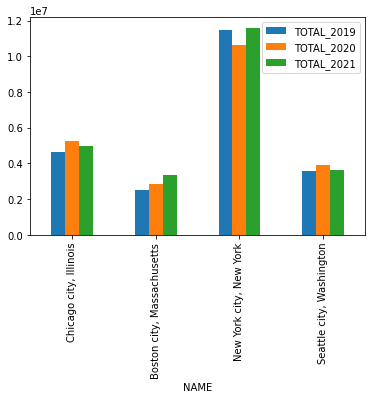

In [132]:
plt.figure(figsize = (5,12))
population_states.plot.bar()

In [145]:
population2019 = names.merge(population2019, how = "right", left_index = True, right_index = True)
population2019

,NAME,S0701_C01_004E,S0701_C01_004M,S0701_C01_005E,S0701_C01_005M,S0701_C01_006E,S0701_C01_006M,S0701_C01_007E,S0701_C01_007M,S0701_C01_008E,S0701_C01_008M,S0701_C01_009E,S0701_C01_009M
1,United States,175305017.4,4518.1,189332379.6,4590.0,96213834.2,3635.1,61010575.5,3689.5,59941047.6,1803.2,43911665.2,2096.7
2,"Chicago city, Illinois",1720073.4,6443.0,2022969.0,4582.0,562350.6,2986.8,186730.8,2538.9,362696.4,3490.0,111633.0,1945.8
3,"Boston city, Massachusetts",1720285.8,4039.2,1106614.3,4301.7,188691.8,2383.2,202256.4,2989.8,82784.4,2129.4,30362.4,777.0
4,"New York city, New York",4307564.8,925.2,4771964.6,407.1,1171552.0,198.6,417099.2,108.2,523855.5,80.6,398152.0,150.2
5,"Seattle city, Washington",1219291.5,16728.0,1752047.0,11071.5,350897.1,6016.8,166082.8,5119.4,51255.4,2324.0,62807.8,3035.7


<AxesSubplot:>

<Figure size 360x864 with 0 Axes>

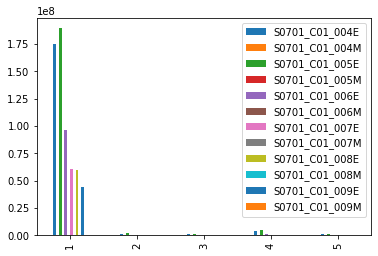

In [146]:
population2019.set_index('NAME')
plt.figure(figsize = (5,12))
population2019.plot.bar()